In [1]:
using CausalForest
using StatsBase
using Plots
using Distributions

Modèle 

$$Y = 10 X_1 + \epsilon$$

X est 10 features toutes uniformes sur [0,1].

Epsilon suit loi normale (0,1).

$n=10^3$ observations

In [2]:
n, m = 10^3, 10
u = Uniform()
features = rand(u, (n, m))
d = Normal()
eps = rand(d, 1000)
labels = features*[10, 0, 0, 0, 0, 0, 0, 0, 0, 0]  .+ eps

model = build_forest_oob(labels, features, 10, 1000);

In [3]:
function get_all_nodes_in_tree!(
    tree ,
    depth = 3,
    result  = []
    )
    if hasproperty(tree, :featid) && depth > 0
        push!(result, tree.featid)
        get_all_nodes_in_tree!(tree.left, depth-1, result)
        get_all_nodes_in_tree!(tree.right, depth-1, result)
    end
    return result
end

get_all_nodes_in_tree! (generic function with 3 methods)

In [4]:
function get_freq(forest, depth=3) 
    ensemble = forest.trees
    n_trees = length(ensemble)
    res = []
    for i = 1:n_trees
        append!(res, get_all_nodes_in_tree!(forest.trees[i].tree, depth))
    end
    return proportionmap(res)
end

get_freq (generic function with 2 methods)

In [5]:
get_freq(model, 3)

Dict{Any, Float64} with 10 entries:
  5  => 0.000285714
  4  => 0.000857143
  6  => 0.000285714
  7  => 0.000571429
  2  => 0.00471429
  10 => 0.002
  9  => 0.000857143
  8  => 0.000571429
  3  => 0.000428571
  1  => 0.989429

In [6]:
get_freq(model, 5)

Dict{Any, Float64} with 10 entries:
  5  => 0.0687565
  4  => 0.0600758
  6  => 0.0636927
  7  => 0.079504
  2  => 0.072649
  10 => 0.0808818
  9  => 0.0595591
  8  => 0.059938
  3  => 0.0852911
  1  => 0.369652

In [7]:
get_freq(model, 10)

Dict{Any, Float64} with 10 entries:
  5  => 0.0899888
  4  => 0.0908363
  6  => 0.0894614
  7  => 0.0978897
  2  => 0.0890283
  10 => 0.0958838
  9  => 0.08367
  8  => 0.0871731
  3  => 0.0997919
  1  => 0.176277

Modèle

$$\Theta(X) = 10 X_1$$

$$Y = \Theta(X) T + 0.5$$

X est 10 features toutes uniformes sur [0,1].

T suit loi bernouilli p=0.5.

$n=10^4$ observations

In [8]:
n, m = 10^4, 10
u = Uniform()
features = rand(u, (n, m))
X = features
d = Normal()
eps = rand(d, n)
b = Bernoulli()
T = convert(Vector{Int64},rand(b, n))
Y = features*[10, 0, 0, 0, 0, 0, 0, 0, 0, 0].*T  .+ 0.5

cf1 = build_forest(false, true, Y, T, features, true, 10, 1000);

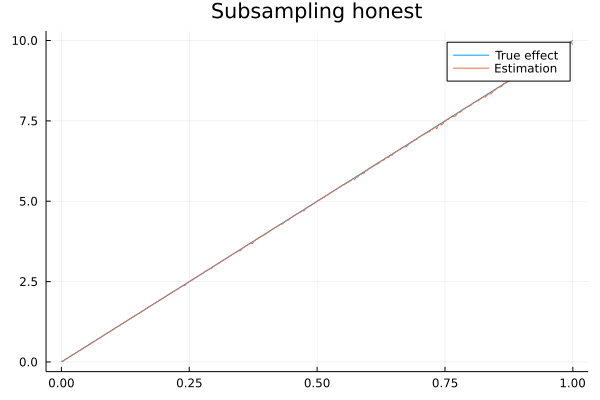

In [9]:
Xtest = rand(Float64, (1000, size(X, 2)));
Xtest[:, 1] =  LinRange(0, 1, 1000);
true_effect = Xtest[:, 1].*10;
pred1 = apply_forest(cf1, Xtest);
plot(Xtest[:, 1], [true_effect, pred1], label=["True effect" "Estimation"], title = "Subsampling honest", fmt = :png)

In [10]:
get_freq(cf1, 3)

Dict{Any, Float64} with 1 entry:
  1 => 1.0

In [11]:
get_freq(cf1, 5)

Dict{Any, Float64} with 1 entry:
  1 => 1.0

In [12]:
get_freq(cf1, 10)

Dict{Any, Float64} with 10 entries:
  5  => 0.00603356
  4  => 0.00625136
  6  => 0.00623282
  7  => 0.00637648
  2  => 0.00600112
  10 => 0.00553308
  9  => 0.00660818
  8  => 0.00618185
  3  => 0.00648306
  1  => 0.944298

In [13]:
get_freq(cf1, 1000)

Dict{Any, Float64} with 10 entries:
  5  => 0.00603356
  4  => 0.00625136
  6  => 0.00623282
  7  => 0.00637648
  2  => 0.00600112
  10 => 0.00553308
  9  => 0.00660818
  8  => 0.00618185
  3  => 0.00648306
  1  => 0.944298

Modèle

$$\Theta(X) = 10 X_1$$

$$Y = \Theta(X) T + \epsilon$$

X est 10 features toutes uniformes sur [0,1].

T suit loi bernouilli p=0.5.

Epsilon suit loi normale (0,1).

$n=10^4$ observations

In [14]:
Y = features*[10, 0, 0, 0, 0, 0, 0, 0, 0, 0].*T  .+ eps

cf1 = build_forest(false, true, Y, T, X, true, 10, 1000);

In [15]:
get_freq(cf1, 3)

Dict{Any, Float64} with 1 entry:
  1 => 1.0

In [16]:
get_freq(cf1, 5)

Dict{Any, Float64} with 10 entries:
  5  => 0.0517603
  4  => 0.0609533
  6  => 0.0759751
  7  => 0.0540919
  2  => 0.0645838
  10 => 0.0584219
  9  => 0.0636179
  8  => 0.0640842
  3  => 0.0681811
  1  => 0.438331

In [17]:
get_freq(cf1, 10)

Dict{Any, Float64} with 10 entries:
  5  => 0.0901486
  4  => 0.0920745
  6  => 0.0996958
  7  => 0.0935134
  2  => 0.0962599
  10 => 0.0941371
  9  => 0.0929444
  8  => 0.0934258
  3  => 0.0972447
  1  => 0.150556

In [18]:
get_freq(cf1, 1000)

Dict{Any, Float64} with 10 entries:
  5  => 0.0920343
  4  => 0.093527
  6  => 0.0997333
  7  => 0.0954125
  2  => 0.096844
  10 => 0.0956307
  9  => 0.0942952
  8  => 0.0948364
  3  => 0.0979046
  1  => 0.139782

$n=10^5$ maintenant

Modèle

$$\Theta(X) = 10 X_1$$

$$Y = \Theta(X) T + 0.5$$

X est 10 features toutes uniformes sur [0,1].

T suit loi bernouilli p=0.5.

$n=10^5$ observations

In [19]:
n, m = 10^5, 10
u = Uniform()
features = rand(u, (n, m))
X = features
d = Normal()
eps = rand(d, n)
b = Bernoulli()
T = convert(Vector{Int64},rand(b, n))
Y = features*[10, 0, 0, 0, 0, 0, 0, 0, 0, 0].*T  .+ 0.5

cf1 = build_forest(false, true, Y, T, features, true, 10, 1000);

In [20]:
get_freq(cf1, 3)

Dict{Any, Float64} with 1 entry:
  1 => 1.0

In [21]:
get_freq(cf1, 5)

Dict{Any, Float64} with 1 entry:
  1 => 1.0

In [22]:
get_freq(cf1, 10)

Dict{Any, Float64} with 10 entries:
  5  => 1.76438e-5
  4  => 2.35251e-5
  6  => 1.56834e-5
  7  => 2.15647e-5
  2  => 1.27428e-5
  10 => 1.76438e-5
  9  => 2.15647e-5
  8  => 1.17625e-5
  3  => 1.47032e-5
  1  => 0.999843

In [23]:
get_freq(cf1, 1000)

Dict{Any, Float64} with 10 entries:
  5  => 0.00577194
  4  => 0.00580305
  6  => 0.00570405
  7  => 0.00578749
  2  => 0.00563193
  10 => 0.00570877
  9  => 0.00577099
  8  => 0.00572763
  3  => 0.00570123
  1  => 0.948393

Modèle

$$\Theta(X) = 10 X_1$$

$$Y = \Theta(X) T + \epsilon$$

X est 10 features toutes uniformes sur [0,1].

T suit loi bernouilli p=0.5.

Epsilon suit loi normale (0,1).

$n=10^5$ observations

In [24]:
Y = features*[10, 0, 0, 0, 0, 0, 0, 0, 0, 0].*T  .+ eps

cf1 = build_forest(false, true, Y, T, X, true, 10, 1000);

In [25]:
get_freq(cf1, 3)

Dict{Any, Float64} with 1 entry:
  1 => 1.0

In [26]:
get_freq(cf1, 5)

Dict{Any, Float64} with 10 entries:
  5  => 0.0169677
  4  => 0.0193226
  6  => 0.0194516
  7  => 0.022871
  2  => 0.0258387
  10 => 0.0223871
  9  => 0.0245484
  8  => 0.0207742
  3  => 0.0241613
  1  => 0.803677

In [27]:
get_freq(cf1, 10)

Dict{Any, Float64} with 10 entries:
  5  => 0.0931147
  4  => 0.09544
  6  => 0.092583
  7  => 0.0937168
  2  => 0.0948656
  10 => 0.0956706
  9  => 0.0951838
  8  => 0.0941802
  3  => 0.094714
  1  => 0.150531

In [28]:
get_freq(cf1, 1000)

Dict{Any, Float64} with 10 entries:
  5  => 0.0990191
  4  => 0.0996672
  6  => 0.0984634
  7  => 0.0989724
  2  => 0.0983849
  10 => 0.0990435
  9  => 0.0993128
  8  => 0.0983706
  3  => 0.0988243
  1  => 0.109942